# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm

In [20]:
medical = pd.read_csv('insurance2.csv')

In [13]:
medical.shape

(1338, 8)

In [14]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

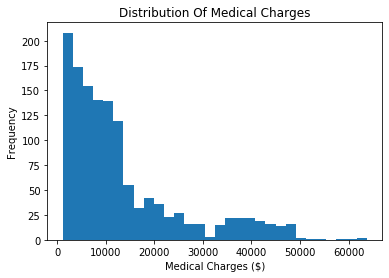

In [17]:
_=plt.hist(medical.charges, bins = 30)
_=plt.title('Distribution Of Medical Charges')
_=plt.xlabel('Medical Charges ($)')
_=plt.ylabel('Frequency')
plt.show()

In [27]:
mean = np.mean(medical.charges)
median = np.median(medical.charges)
std_dev=np.std(medical.charges)
print(mean)
print(std_dev)
print(median)
print(len(medical.charges))
# This does not follow a normal distribution.  This follows an exponential decay function with a high left to lower right.
# The mean is much higher than the median.

13270.422265141257
12105.484975561605
9382.033
1338


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [ ]:
# From the given set of data - the numpy random choice function will replicate the data set many times so as to generate a set of means from all the samples.  From the CLT theory, the mean of means is probably closer to the true mean than any one of our sample means.  The focus here is estimating the population mean of the medical charges through resampling the data and determining the mean of means.
# A random sampling function was created to produce replicate samples of data from the medical charge.  Since there are 1338 listed values within our initial dataset, we will choose 1338 values 300 times as specified within our list comprehensiion; sample_of_means

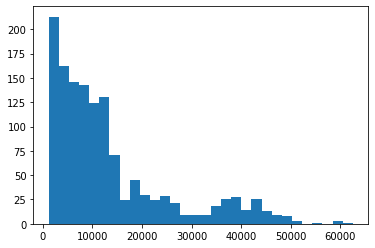

In [30]:
def random_sampler_from_data(n):
    return np.random.choice(medical.charges, n)
sample_of_mean = random_sampler_from_data(1338)
_=plt.hist(sample_of_mean, bins = 30)

As shown here, a re-sampled set of data containing 1338 entries is drawn.  Note that it is also not a normal distribution.

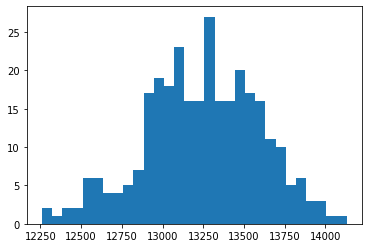

In [31]:
sample_of_means = np.array([np.mean(random_sampler_from_data(1338)) for i in range(300)])
_=plt.hist(sample_of_means, bins = 30)

In [32]:
np.mean(sample_of_means)

13243.244409618468

Note that the histogram below is a normal distribution,  which is fine because it's expected.  An array of means can be normally distributed where each mean is of data that is not normally distributed.  Since the mean of means estimates the population mean, to answer the administrator's question, the actual average cost is not below 12000 and therefore as of now has not fallen below 12000.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

In [39]:
print(np.quantile(sample_of_means, 0.025), np.quantile(sample_of_means, 0.975))

12532.534386840267 13882.926354327748


From the quantile ranges above, 95% of the time the mean is within the range of 12532.53 and 13882.93.  However, in context of the administrator's concern a one-sided interval will suffice.  Since the 95% confidence interval is above 12000, she does not need to be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

Null Hypothesis: People with insurance are not charged a different amount incomparison to people without insurance.

Alternative Hypothesis: People with insurance are charged a different amount incomparison to people without insurance.

The assumption about the two samples here is that they have the same variance.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [41]:
medical.head() # created our two arrays; with_insurance for people with insurance and without_insurance for people without insurance.
with_insurance = medical.charges.loc[medical.insuranceclaim == 1]
without_insurance = medical.charges.loc[medical.insuranceclaim == 0]

In [52]:
# Manual Computation
n_with_insurance = len(with_insurance)
n_without_insurance = len(without_insurance)

s_with_insurance = np.std(with_insurance)
s_without_insurance = np.std(without_insurance)

mean_with_insurance = np.mean(with_insurance)
mean_without_insurance = np.mean(without_insurance)

a = n_with_insurance - 1

b = n_without_insurance - 1

c = a*(s_with_insurance**2)

d = b*(s_without_insurance**2)

e = c + d # numerator

f = n_with_insurance + n_without_insurance - 2 # denominator

s_pooled = np.sqrt(e/f) # This formula has been simplified to a ratio to ensure it's excecution is accurate.

t = (mean_with_insurance - mean_without_insurance)/(s_pooled * (np.sqrt((1/n_with_insurance) + (1/n_without_insurance))))
print(n_with_insurance)
print(n_without_insurance)
print(s_with_insurance)
print(s_without_insurance)
print(mean_with_insurance)
print(mean_without_insurance)
print(s_pooled)
print(t)
print(norm.pdf(t)) # According to this result, the two groups are substantially different.
                   # With a t value in either direction, if the null hypothesis is true, the probability of obtaining a t-value
                   # is 6.98e-32 the null hypothesis is rejected.

783
555
14036.956250260411
6440.699841605233
16423.928276537663
8821.421892306294
11512.282899205744
11.901306943555385
6.981270779090461e-32


In [72]:
t, p_val = scipy.stats.ttest_ind(with_insurance, without_insurance, equal_var = True)
print(t, p_val)

11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [74]:
t, p_val = scipy.stats.ttest_ind(with_insurance, without_insurance, equal_var = False)
print(t, p_val)

13.298031957975649 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

lookup scipy.stats.zscore or scipy.stats.zmap to determine z-scores.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test